In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
sample = pd.read_csv("./data/sample_submission.csv")

C:\Users\Koke\AppData\Local\Temp\ipykernel_27272\3535135425.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [3]:
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [4]:
train.drop(columns = 'id', inplace = True)
test.drop(columns = 'id', inplace = True)

In [5]:
from Paquetes.visualization import Eda
train_eda = Eda(train)

In [6]:
train_eda.infocat

__________________________________________________________________
Categorias para la columna == Drug:  ['Placebo', 'D-penicillamine']
Frecuencia de las categorias : 
 Drug
Placebo            4010
D-penicillamine    3895
Name: count, dtype: int64
Numero de categorias en la columna == Drug ---  2
Numero de valores nulos en la columna == Drug ---  0
Informacion generica == Drug : 
  count        7905
unique          2
top       Placebo
freq         4010
Name: Drug, dtype: object
__________________________________________________________________
__________________________________________________________________
Categorias para la columna == Sex:  ['F', 'M']
Frecuencia de las categorias : 
 Sex
F    7336
M     569
Name: count, dtype: int64
Numero de categorias en la columna == Sex ---  2
Numero de valores nulos en la columna == Sex ---  0
Informacion generica == Sex : 
  count     7905
unique       2
top          F
freq      7336
Name: Sex, dtype: object
___________________________________

__________________________________________________________________
Numero de valores diferentes en la columna == N_Days ---  461
Tamaño de la columna == N_Days ---  7905
% de valores unicos frente al numero de muestras de la columna == N_Days ---  5.832 %
Media de la columna == N_Days ---  2030.1733
------------------------------------------------------------------
Maximo valor de la columna == N_Days ---  4795
Informacion del maximo valor en la columna : N_Days:
 N_Days            4795.00
Age              19025.00
Bilirubin            1.00
Cholesterol        331.00
Albumin              3.70
Copper              54.00
Alk_Phos           466.00
SGOT                99.33
Tryglicerides      133.00
Platelets          243.00
Prothrombin         10.60
Stage                3.00
Name: 565, dtype: float64
------------------------------------------------------------------
Numero de valores nulos en la columna == N_Days ---   0
Numero de valores '0' en la columna == N_Days ---   0
Porcentaje de va

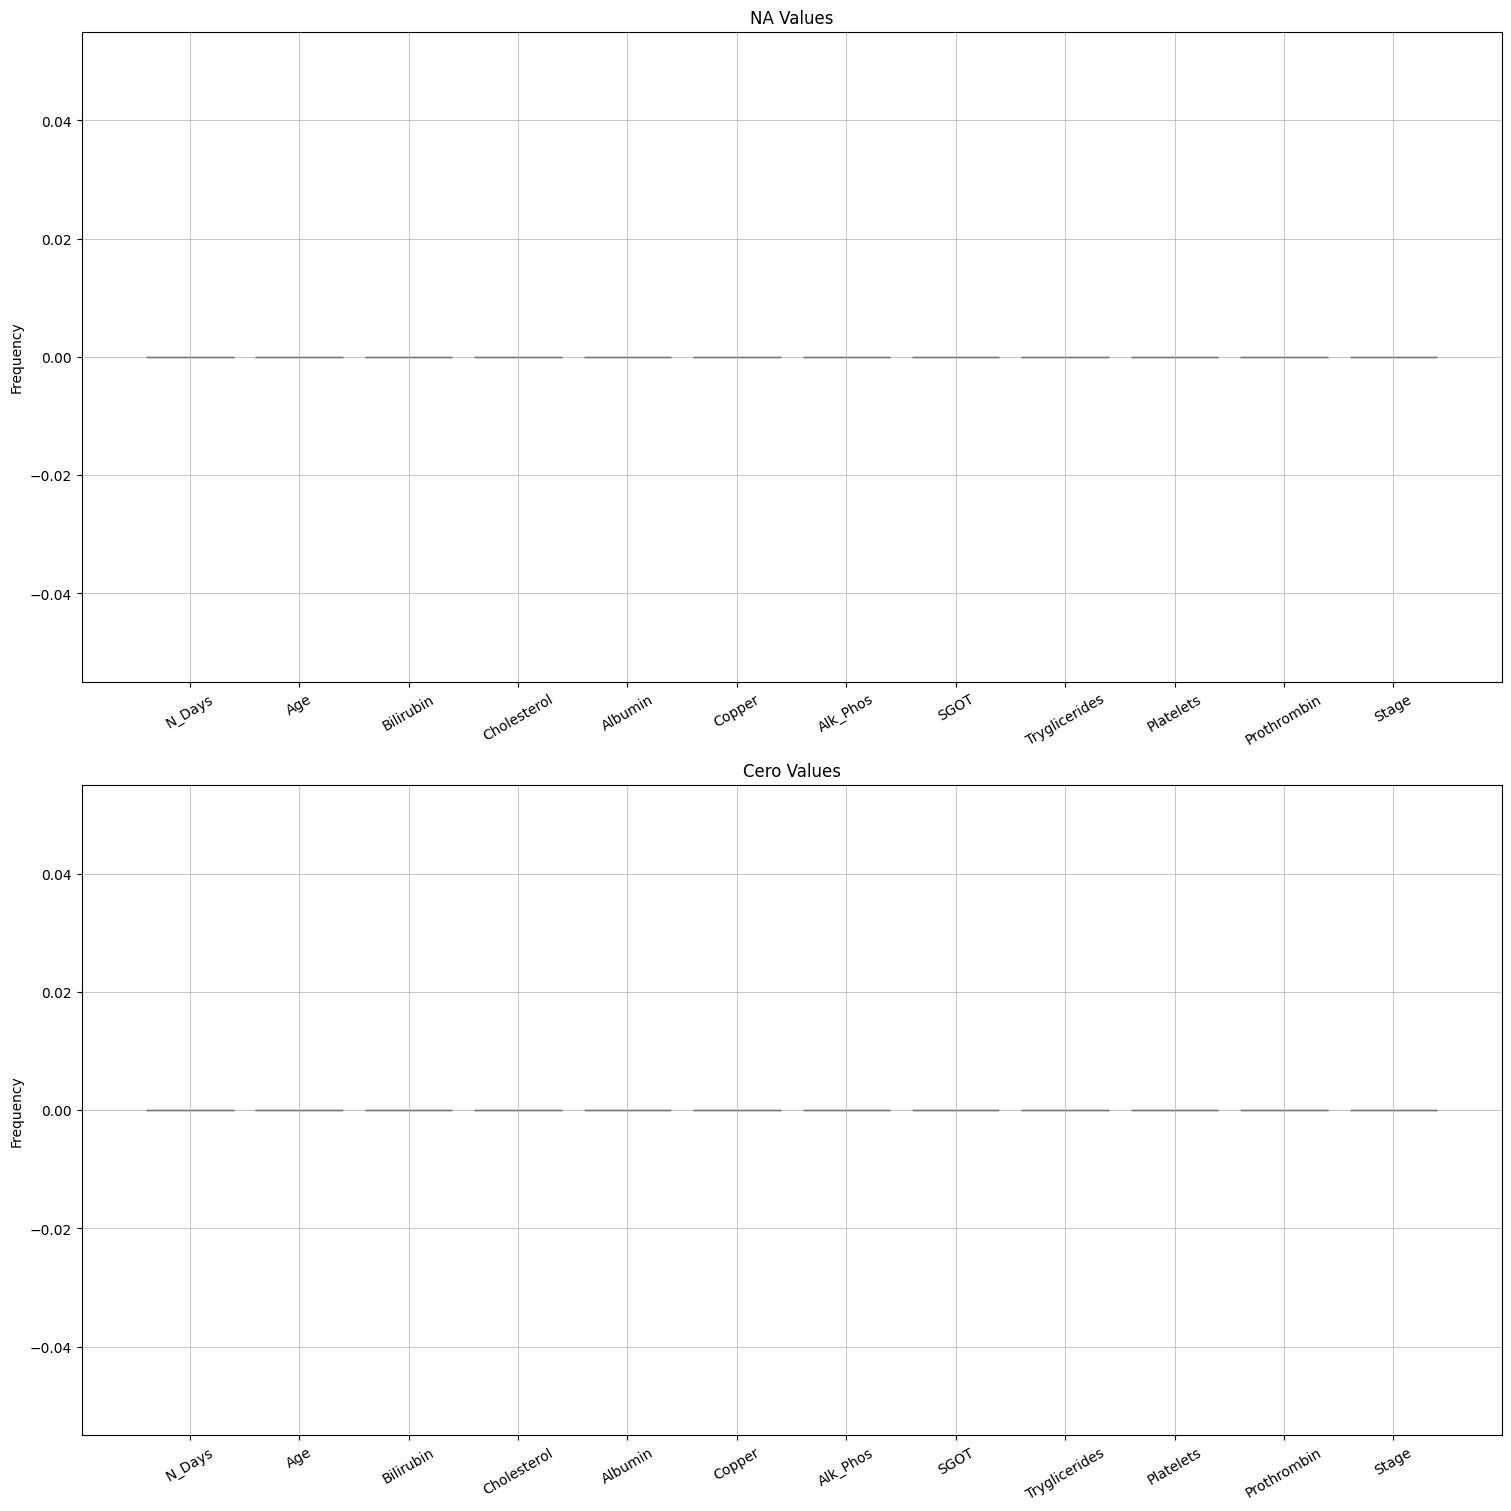

In [7]:
fture_num_df_info = train_eda.infonum

In [8]:
fture_num_df_info.head(12)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
COUNT,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
MIN,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
MAX,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000
MEAN,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
STD,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
NA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
NA %,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


EDA CONTINUAR ...

Tratamiento del desbalanceo de clases:

In [9]:
# Proporciones de las status clases dentro de la status feature para estudiar analiticamente el posible desbalanceo de clases 
print(f"Clases : {train_eda.data['Status'].unique()}")
for _ ,unique in enumerate(train_eda.data["Status"].unique()):
    print(f'Proporción de la clase {unique} : {round(100 *train_eda.data["Status"][train_eda.data["Status"]== unique].shape[0]/train_eda.data["Status"].shape[0],3)} %')


Clases : ['D' 'C' 'CL']
Proporción de la clase D : 33.713 %
Proporción de la clase C : 62.808 %
Proporción de la clase CL : 3.479 %


MUY DESBALANCEADO EN LA CLASE CL

In [10]:
# check version number
import imblearn
print(imblearn.__version__)

0.12.0


In [11]:
# Codification of categorical features
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


x_cat = train_eda.cat_data.drop(columns = "Status").values
x_num = train_eda.num_data.values
y = train_eda.data["Status"].values
print("Old classes : ", np.unique(y))

"""print(x_cat.shape)
print(x_num.shape)
print(y.shape)"""

one_hot = OneHotEncoder()
one_hot.fit(x_cat)
cat_col_encoded = one_hot.transform(x_cat).toarray()
#print(one_hot.categories_)

"""print(cat_col_encoded.shape)"""

X_encoded = np.hstack((cat_col_encoded, x_num))
"""print(X_encoded.shape)"""


lab_encoder = LabelEncoder()
y_encoded = lab_encoder.fit_transform(y)

"""print(X_encoded.shape, y_encoded.shape)
"""

# Aseguramos proporciones de las clases de nuevo
print("New codify classes : ", np.unique(y_encoded))
print(f"Frecuencia de clases : {np.bincount(y_encoded)}")
for idx, v in enumerate(np.bincount(y_encoded)):
    print(f'Proporción de la clase {idx} : {100*v/y_encoded.shape[0] : .3f}','%')



Old classes :  ['C' 'CL' 'D']
New codify classes :  [0 1 2]
Frecuencia de clases : [4965  275 2665]
Proporción de la clase 0 :  62.808 %
Proporción de la clase 1 :  3.479 %
Proporción de la clase 2 :  33.713 %


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_encoded,y_encoded,test_size=0.2, random_state=42, shuffle=True, stratify = y_encoded )
print(X_train.shape, y_train.shape)

(6324, 25) (6324,)


In [13]:
from Paquetes.imbalanced import synthetic_resample

In [14]:
# Undersampling
X_resampled , y_resampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.3 ,
                            technique = "undersampling",
                            verbose  = 1
                            )
print(X_resampled.shape, y_resampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 25)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (3543, 25)
y resampled shape :  (3543,)
New dataset number of samples : 3543
% of increment compare to original dataset : -43.98 %
Target classes :  [0 1 2]
New class frequencies : [1191  220 2132]
New proportion of class 0 :  33.62 %
New proportion of class 1 :  6.21 %
New proportion of class 2 :  60.17 %
(3543, 25) (3543,)


In [15]:
# Oversampling
X_resampled , y_resampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.2 ,
                            technique = "oversampling",
                            verbose  = 1
                            )
print(X_resampled.shape, y_resampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 25)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (6898, 25)
y resampled shape :  (6898,)
New dataset number of samples : 6898
% of increment compare to original dataset : 9.08 %
Target classes :  [0 1 2]
New class frequencies : [3972  794 2132]
New proportion of class 0 :  57.58 %
New proportion of class 1 :  11.51 %
New proportion of class 2 :  30.91 %
(6898, 25) (6898,)


In [33]:
# SMOTE
X_resampled , y_resampled = synthetic_resample(
                            X = X_train,
                            y  = y_train,
                            ratio = 0.3 ,
                            technique = "SMOTE",
                            verbose  = 1
                            )
print(X_resampled.shape, y_resampled.shape)

y input type : int32  | y input shape :  (6324,)
X input type : float64 | X input shape :  (6324, 25)
-----------------------------------------------------------
Original dataset number of samples : 6324
Classes in the target variable :  [0 1 2]
Class frequencies : [3972  220 2132]
Proportion of class 0 :  62.81 %
Proportion of class 1 :  3.48 %
Proportion of class 2 :  33.71 %
-----------------------------------------------------------
X resampled shape :  (7295, 25)
y resampled shape :  (7295,)
New dataset number of samples : 7295
% of increment compare to original dataset : 15.35 %
Target classes :  [0 1 2]
New class frequencies : [3972 1191 2132]
New proportion of class 0 :  54.45 %
New proportion of class 1 :  16.33 %
New proportion of class 2 :  29.23 %
(7295, 25) (7295,)


In [20]:
print(X_resampled.shape,y_resampled.shape,X_test.shape,y_test.shape)

(6699, 25) (6699,) (1581, 25) (1581,)


In [21]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score,precision_score,f1_score
from sklearn.pipeline import Pipeline


tree = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=0.1, random_state=1)
log_reg  = LogisticRegression(penalty = None,random_state=1,multi_class ='ovr',n_jobs = -1)
rdf_tree = RandomForestClassifier(   
                                    n_estimators=100,
                                    criterion='entropy', 
                                    max_depth=6, 
                                    min_samples_split=3,
                                    bootstrap=True, 
                                    oob_score=False, 
                                    n_jobs=-1, 
                                    random_state=42, 
        
                                  )

pipe = Pipeline(
                    steps=[
                                ("estimator",ada)
                            ]
                    )
pipe2 = Pipeline(
                    steps=[
                                ("estimator",log_reg)
                            ]
                    )

def fit_and_predict(estimator, X_train,y_train,X_test, y_test) -> None:
    """_summary_

    Args:
        estimator (_type_): _description_
        X_train (_type_): _description_
        y_train (_type_): _description_
        X_test (_type_): _description_
        y_test (_type_): _description_
    """
    estimator.fit(X_train, y_train)
    print(f"For {str(estimator.__class__).split('.')[-1][0:len(str(estimator.__class__).split('.')[-1])-2]} : ")
    for idx,t in enumerate([(estimator.predict(X_train),y_train),(estimator.predict(X_test),y_test)]):
        y_true = t[1]
        y_pred = t[0]
        d = {0:"Train",1:"Test"}
        
        print(f"{d.get(idx)} set micro precision - {precision_score(y_true, y_pred,average ='micro'):.3f} %")
        print(f"{d.get(idx)} set macro precision - {precision_score(y_true, y_pred, average ='macro'):.3f} %")
        print(f"{d.get(idx)} set micro recall - {recall_score(y_true, y_pred,average ='micro'):.3f} %")
        print(f"{d.get(idx)} set macro recall - {recall_score(y_true, y_pred,average ='macro'):.3f} %")
        print(f"{d.get(idx)} set micro f1 score - {f1_score(y_true, y_pred, average ='micro'):.3f} %")
        print(f"{d.get(idx)} set macro f1 score - {f1_score(y_true, y_pred, average ='macro'):.3f} %")
        print(f"{d.get(idx)} set accuracy - {accuracy_score(y_true, y_pred):.3f} %")
    print(f"-------------------------------------------------------------------- ")
    


estimators = [tree, ada, log_reg, rdf_tree]
for estimator in estimators:
    fit_and_predict(estimator, X_resampled,y_resampled,X_test, y_test)


For DecisionTreeClassifier : 
Train set micro precision - 0.793 %
Train set macro precision - 0.761 %
Train set micro recall - 0.793 %
Train set macro recall - 0.664 %
Train set micro f1 score - 0.793 %
Train set macro f1 score - 0.696 %
Train set accuracy - 0.793 %
Test set micro precision - 0.788 %
Test set macro precision - 0.608 %
Test set micro recall - 0.788 %
Test set macro recall - 0.584 %
Test set micro f1 score - 0.788 %
Test set macro f1 score - 0.594 %
Test set accuracy - 0.788 %
-------------------------------------------------------------------- 


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoostClassifier : 
Train set micro precision - 0.912 %
Train set macro precision - 0.941 %
Train set micro recall - 0.912 %
Train set macro recall - 0.912 %
Train set micro f1 score - 0.912 %
Train set macro f1 score - 0.924 %
Train set accuracy - 0.912 %
Test set micro precision - 0.803 %
Test set macro precision - 0.806 %
Test set micro recall - 0.803 %
Test set macro recall - 0.561 %
Test set micro f1 score - 0.803 %
Test set macro f1 score - 0.582 %
Test set accuracy - 0.803 %
-------------------------------------------------------------------- 
For LogisticRegression : 
Train set micro precision - 0.723 %
Train set macro precision - 0.508 %
Train set micro recall - 0.723 %
Train set macro recall - 0.498 %
Train set micro f1 score - 0.723 %
Train set macro f1 score - 0.482 %
Train set accuracy - 0.723 %
Test set micro precision - 0.753 %
Test set macro precision - 0.491 %
Test set micro recall - 0.753 %
Test set macro recall - 0.491 %
Test set micro f1 score - 0.753 %
Test s

In [22]:
from Paquetes.cross_validate import cv_function

pipelines = [tree, ada, log_reg, rdf_tree]
metrics = [
                'accuracy', 
                'precision_micro',
                'precision_macro',
                'recall_micro',
                'recall_macro',
                'f1_micro',
                'f1_macro',
                'jaccard_micro',
                'jaccard_macro',
                'roc_auc_ovr',
                'roc_auc_ovo',
                'roc_auc_ovr_weighted',
                'roc_auc_ovo_weighted'
            ]
cv_str = ['k-folds', 'Stratified K-folds','GroupKFold','RepeatedStratifiedKFold']

scores = cv_function(
                        X_train = X_resampled, 
                        y_train = y_resampled, 
                        n_splits=5,
                        pipelines = pipelines, 
                        metrics = metrics,
                        cv_strategies = cv_str,
                        random_state =  0,
                        shuffle = True,
                        group_by = X_resampled[:,2]
                    )

ValueError : group_by bad defined for GroupKFold strategy applied to DecisionTreeClassifier
ValueError : group_by bad defined for GroupKFold strategy applied to AdaBoostClassifier
ValueError : group_by bad defined for GroupKFold strategy applied to LogisticRegression
ValueError : group_by bad defined for GroupKFold strategy applied to RandomForestClassifier


In [23]:
scores.keys()
    

dict_keys(['Pipeline : 0', 'Pipeline : 1', 'Pipeline : 2', 'Pipeline : 3'])

In [24]:
scores[f"{list(scores.keys())[0]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
DecisionTreeClassifier,NaN,NaN,NaN,NaN
Val accuracy,0.767,0.764,NaN,0.769
Val precision_micro,0.767,0.764,NaN,0.769
Val precision_macro,0.691,0.69,NaN,0.7
Val recall_micro,0.767,0.764,NaN,0.769
Val recall_macro,0.655,0.634,NaN,0.649
Val f1_micro,0.767,0.764,NaN,0.769
Val f1_macro,0.668,0.654,NaN,0.667
Val jaccard_micro,0.622,0.618,NaN,0.625
Val jaccard_macro,0.522,0.509,NaN,0.521


In [25]:
scores[f"{list(scores.keys())[1]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
AdaBoostClassifier,NaN,NaN,NaN,NaN
Val accuracy,0.811,0.807,NaN,0.809
Val precision_micro,0.811,0.807,NaN,0.809
Val precision_macro,0.838,0.842,NaN,0.842
Val recall_micro,0.811,0.807,NaN,0.809
Val recall_macro,0.727,0.723,NaN,0.723
Val f1_micro,0.811,0.807,NaN,0.809
Val f1_macro,0.768,0.765,NaN,0.765
Val jaccard_micro,0.682,0.676,NaN,0.679
Val jaccard_macro,0.628,0.625,NaN,0.626


In [26]:
scores[f"{list(scores.keys())[2]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
LogisticRegression,NaN,NaN,NaN,NaN
Val accuracy,0.722,0.717,NaN,0.719
Val precision_micro,0.722,0.717,NaN,0.719
Val precision_macro,0.57,0.566,NaN,0.524
Val recall_micro,0.722,0.717,NaN,0.719
Val recall_macro,0.498,0.493,NaN,0.495
Val f1_micro,0.722,0.717,NaN,0.719
Val f1_macro,0.483,0.477,NaN,0.48
Val jaccard_micro,0.565,0.559,NaN,0.562
Val jaccard_macro,0.383,0.377,NaN,0.379


In [27]:
scores[f"{list(scores.keys())[3]}"].head(30)

,k-folds,Stratified K-folds,GroupKFold,RepeatedStratifiedKFold
RandomForestClassifier,NaN,NaN,NaN,NaN
Val accuracy,0.799,0.799,NaN,0.798
Val precision_micro,0.799,0.799,NaN,0.798
Val precision_macro,0.849,0.851,NaN,0.848
Val recall_micro,0.799,0.799,NaN,0.798
Val recall_macro,0.659,0.658,NaN,0.657
Val f1_micro,0.799,0.799,NaN,0.798
Val f1_macro,0.705,0.704,NaN,0.702
Val jaccard_micro,0.665,0.665,NaN,0.664
Val jaccard_macro,0.561,0.561,NaN,0.559


c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 0.7919321060180664


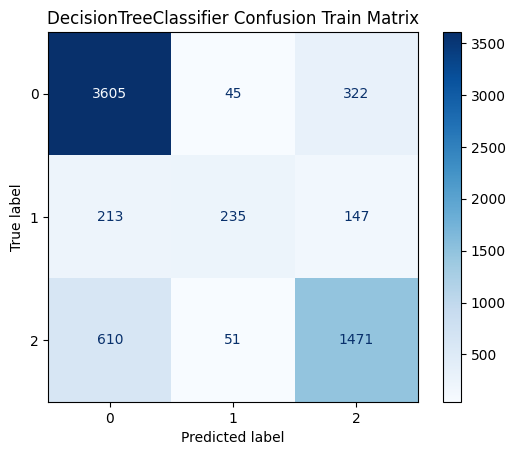

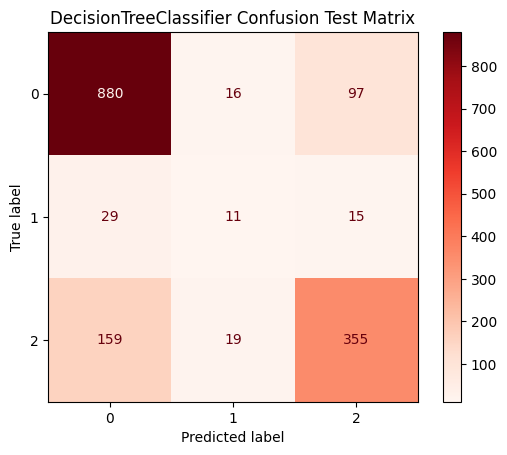

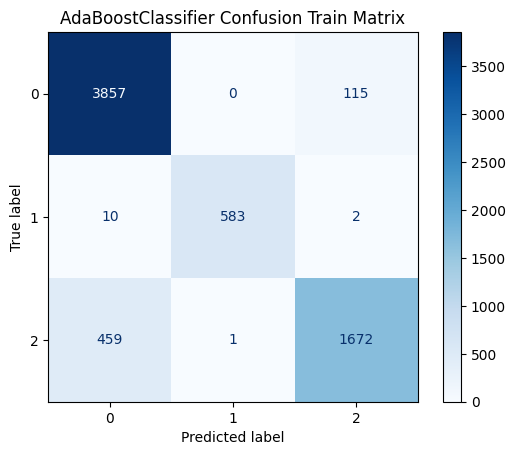

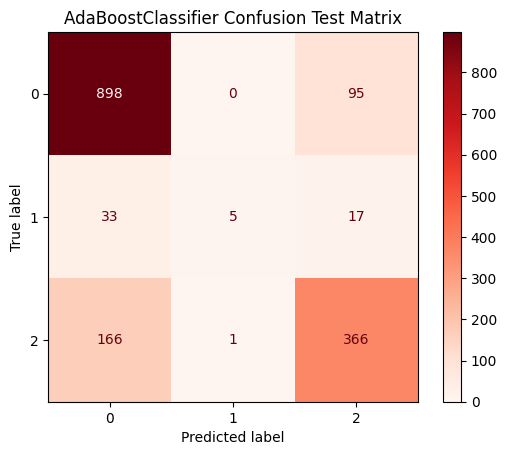

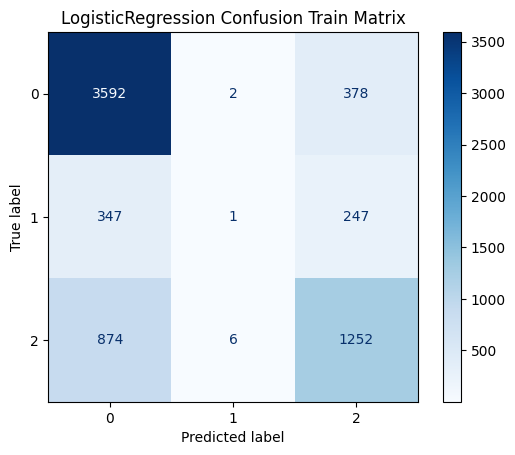

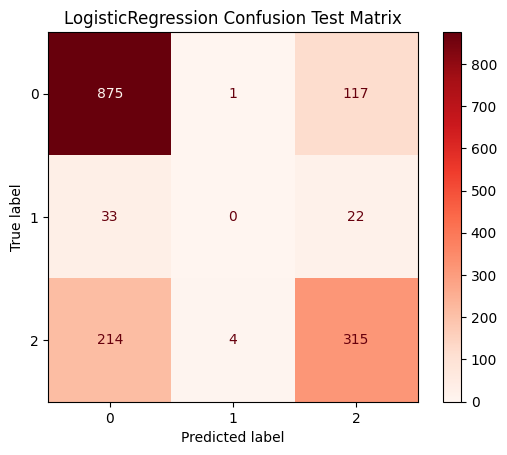

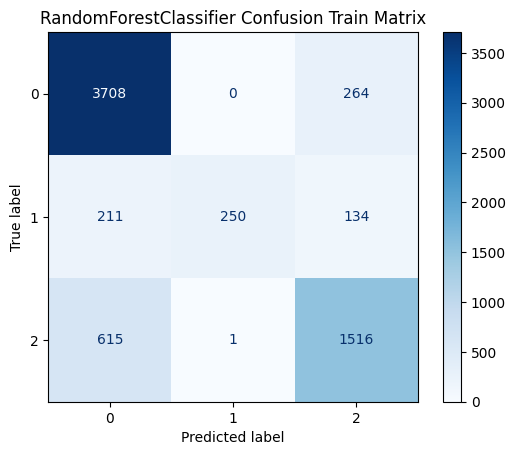

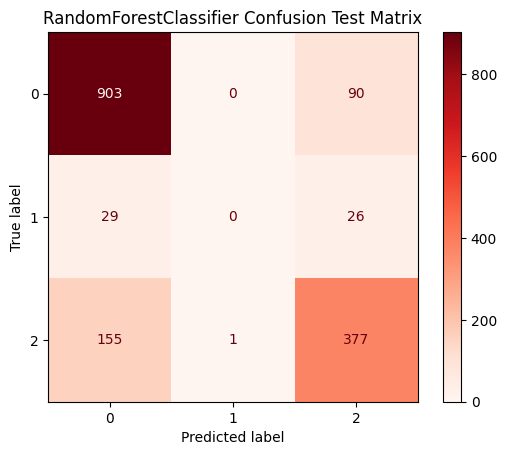

In [28]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_resampled, y_resampled) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_resampled,
                                        x_train= X_resampled,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'micro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" 
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [29]:
# Micro 
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex
DecisionTreeClassifier       NaN       NaN       NaN          NaN
Train                   0.792805  0.792805  0.792805     0.656733
Test                    0.788109  0.788109  0.788109     0.650313
                      Recall Precision   F1Score JaccardIndex
AdaBoostClassifier       NaN       NaN       NaN          NaN
Train               0.912375  0.912375  0.912375     0.838869
Test                0.802657  0.802657  0.802657     0.670365
                      Recall Precision   F1Score JaccardIndex
LogisticRegression       NaN       NaN       NaN          NaN
Train               0.723242  0.723242  0.723242     0.566468
Test                0.752688  0.752688  0.752688     0.603448
                          Recall Precision   F1Score JaccardIndex
RandomForestClassifier       NaN       NaN       NaN          NaN
Train                   0.817137  0.817137  0.817137     0.690813
Test                    0.809614  0.809614

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Exexcution time of clasification_metrics 0.7917921543121338


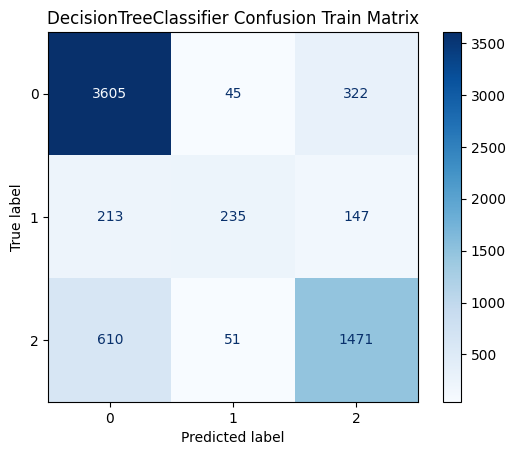

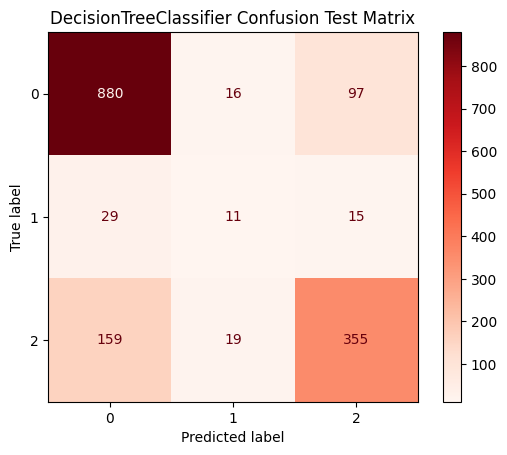

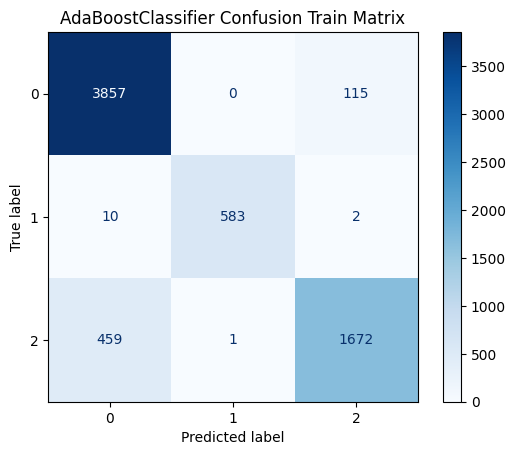

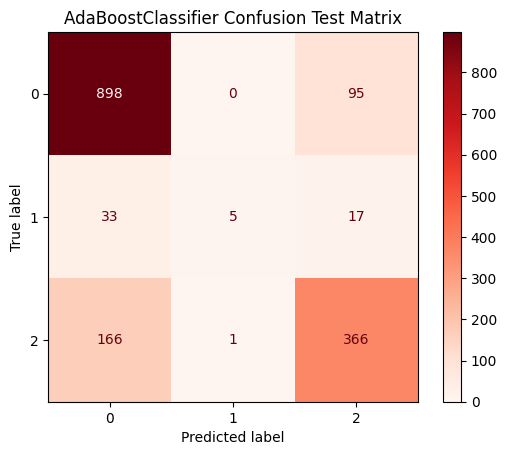

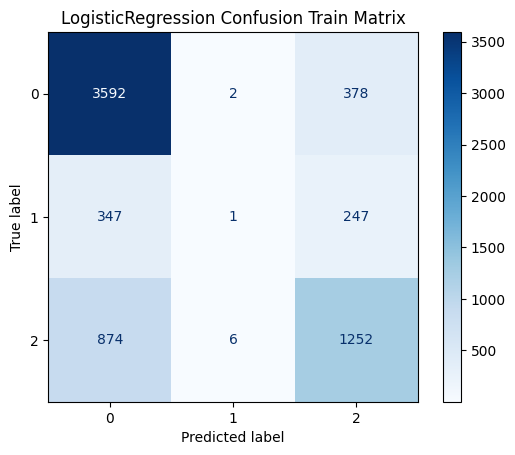

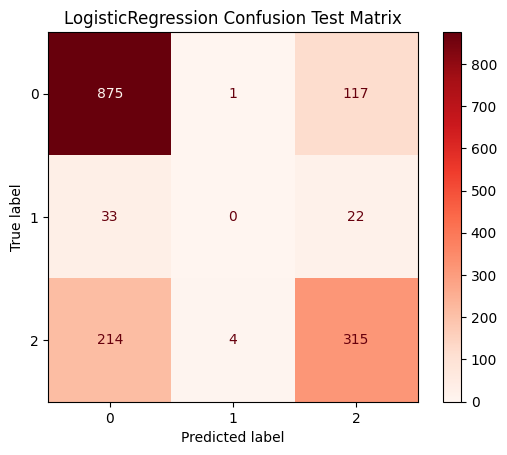

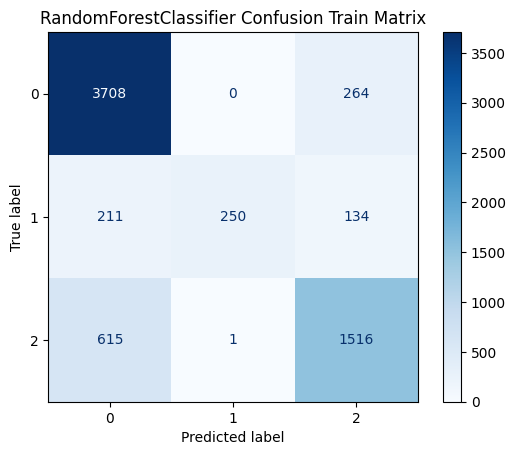

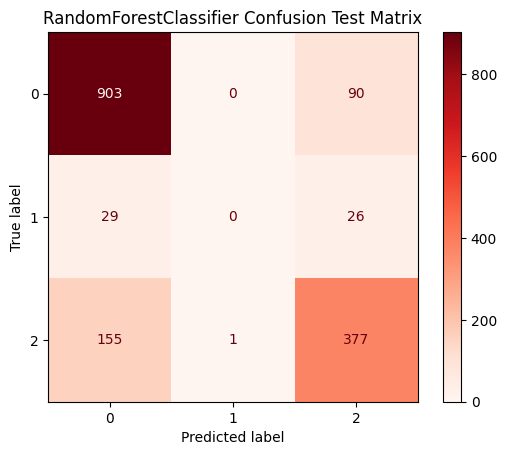

In [30]:
from Paquetes.metrics import  clasification_metrics

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
piplines_fitted = [pipe.fit(X_resampled, y_resampled) for pipe in pipelines]

metrics_list = clasification_metrics(
                                        y_train = y_resampled,
                                        x_train= X_resampled,
                                        y_test  = y_test,
                                        x_test = X_test,
                                        clasifier = piplines_fitted,
                                        average = 'macro',
                                        metrics = [
                                                        "Recall" ,
                                                        "Precision",
                                                        "F1Score",
                                                        "Especificidad" ,
                                                        "JaccardIndex" 
                                                    ],
                                        plot_roc_curve = True,
                                        plot_confusion_matrix = True,

                                        )


In [31]:
# macro
for metric in metrics_list:
    print(metric.head())

                          Recall Precision   F1Score JaccardIndex
DecisionTreeClassifier       NaN       NaN       NaN          NaN
Train                   0.664175  0.760785  0.696129     0.552488
Test                    0.584082  0.607757  0.593925      0.47258
                      Recall Precision   F1Score JaccardIndex
AdaBoostClassifier       NaN       NaN       NaN          NaN
Train               0.911706  0.941491  0.923813     0.863376
Test                 0.56064  0.805873  0.582433     0.470028
                      Recall Precision   F1Score JaccardIndex
LogisticRegression       NaN       NaN       NaN          NaN
Train               0.497751  0.508148  0.481888     0.382492
Test                0.490721   0.49123  0.488574     0.391465
                          Recall Precision   F1Score JaccardIndex
RandomForestClassifier       NaN       NaN       NaN          NaN
Train                   0.688257  0.868632  0.737418     0.597165
Test                    0.538894  0.531811

c:\Users\Koke\Desktop\MASTER_IA\TareaFinalSupervised\env\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


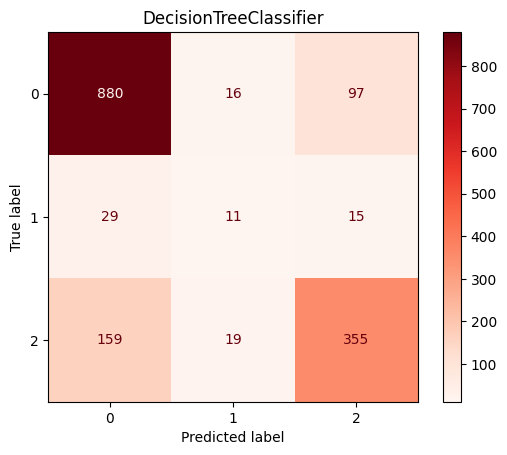

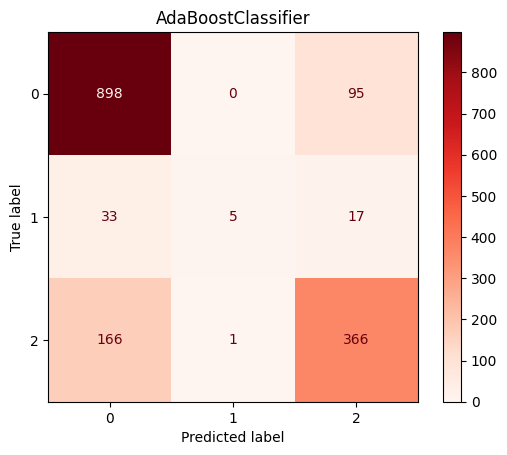

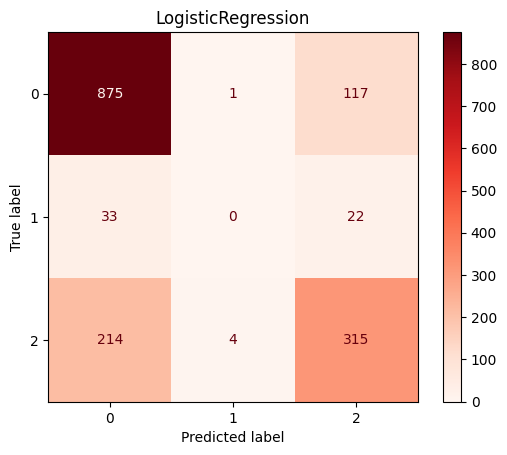

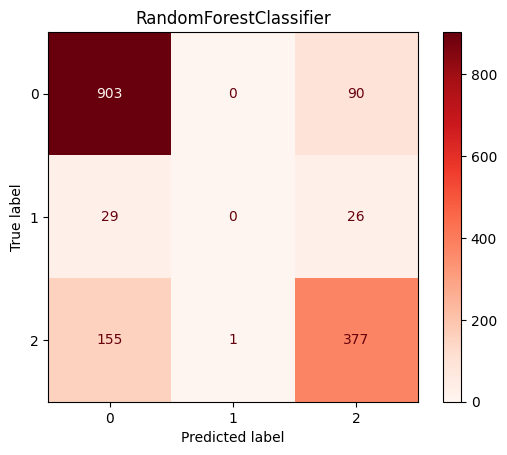

In [32]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# Need first to be trained to use this function
pipelines = [tree, ada, log_reg, rdf_tree]
for pipe in pipelines:
    pipe.fit(X_resampled, y_resampled) 
    disp = ConfusionMatrixDisplay.from_estimator(
                                                estimator=pipe,
                                                X =X_test,
                                                y= y_test,
                                                labels = pipe.classes_,
                                                include_values = True,
                                                cmap = "Reds",
                                                )
    disp.ax_.set_title(f"{str(pipe.__class__).split('.')[-1][0:len(str(pipe.__class__).split('.')[-1])-2]}")

    
